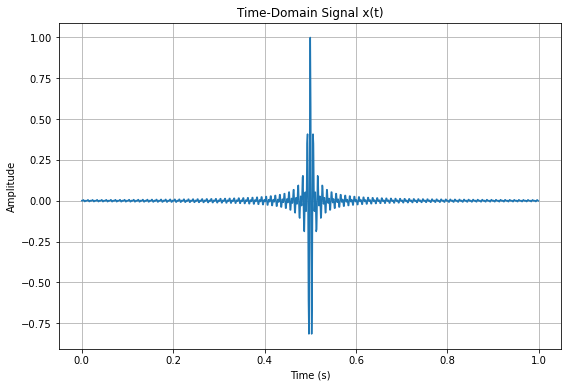

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters
Fs = 1000  # Sampling frequency in Hz
T = 1  # Duration of the signal in seconds
B = 100  # Bandwidth in Hz
t = np.linspace(0, T, int(Fs * T), endpoint=False)  # Time vector

# Generate a pulse signal with bandwidth B
x = np.sinc(B * (t - T / 2)) * np.cos(2 * np.pi * 150 * t)  # Sinc pulse

# Plot the time-domain signal
plt.figure(figsize=(9, 6))
plt.plot(t, x)
plt.title("Time-Domain Signal x(t)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)

# Save the time domain picture of y(t) to a folder
x_time_domain = 'x_time_domain.png'
plt.savefig(x_time_domain)

plt.show()

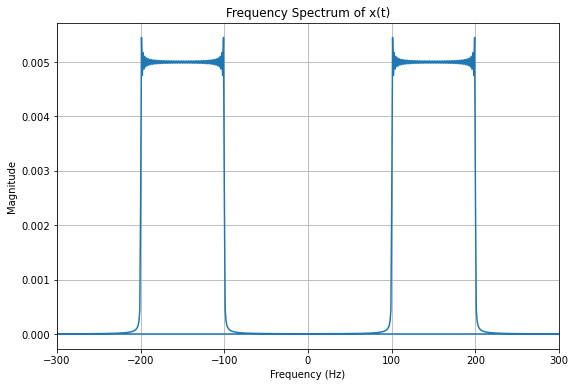

In [9]:
from scipy.fft import fft

# Compute the spectrum of x(t)
X = fft(x)/Fs

# Define the frequency axis
f = np.fft.fftfreq(len(t), 1 / Fs)

# Plot the frequency-domain signal
plt.figure(figsize=(9, 6))
plt.plot(f, np.abs(X))
plt.title("Frequency Spectrum of x(t)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.xlim(-300, 300)  # Adjust the x-axis limits as needed

# Save the time domain picture of y(t) to a folder
x_freq_domain = 'x_freq_domain.png'
plt.savefig(x_freq_domain)

plt.show()

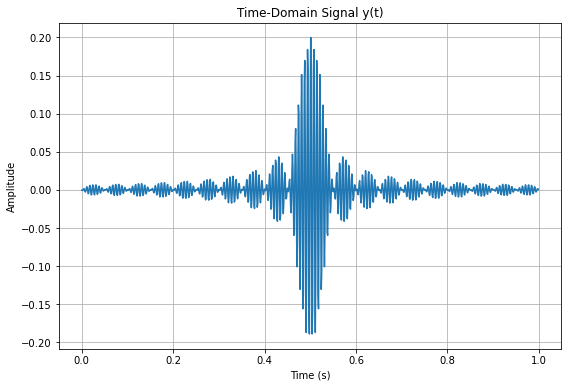

In [10]:
# Define the cutoff frequency of the low-pass filter
Bc = 20  # Choose a cutoff frequency (Bc) that is greater than B

# Compute the impulse response of the ideal low-pass filter
#h_lp = 2 * Bc * np.sinc(2 * Bc * (t - T / 2))
h_lp =  2*Bc * np.sinc(Bc * (t - T / 2)) * np.cos(2*np.pi*150*t)

# Convolve x(t) with h_lp to obtain y(t)
y = np.convolve(x, h_lp, 'same')
y = y / Fs  # Normalize by dividing by the number of data points
# Plot the time-domain signal y(t)
plt.figure(figsize=(9, 6))
plt.plot(t, y)
plt.title("Time-Domain Signal y(t)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)

# Save the time domain picture of y(t) to a folder
y_time_domain = 'y_time_domain.png'
plt.savefig(y_time_domain)

plt.show()

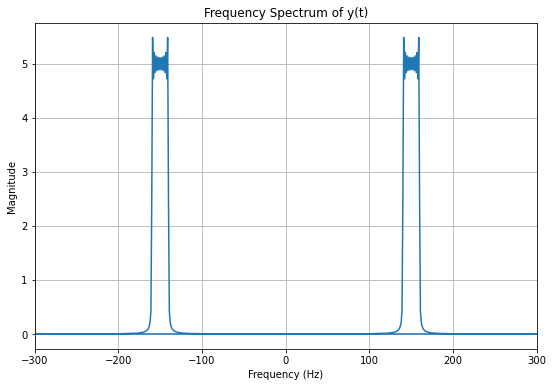

In [11]:
# Compute the spectrum of y(t)
Y = fft(y)

# Plot the frequency-domain signal Y(f)
plt.figure(figsize=(9, 6))
plt.plot(f, np.abs(Y))
plt.title("Frequency Spectrum of y(t)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.xlim(-300, 300)  # Adjust the x-axis limits as needed

# Save the time domain picture of y(t) to a folder
y_freq_domain = 'y_freq_domain.png'
plt.savefig(y_freq_domain)

plt.show()


In [12]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the four images
image_paths = ['x_time_domain.png', 'x_freq_domain.png', 'y_time_domain.png', 'y_freq_domain.png']
images = [Image.open(path) for path in image_paths]

# Determine the size of the output image (assuming all images have the same dimensions)
width, height = images[0].size

# Create a new blank image with the combined width and height
combined_image = Image.new('RGB', (2 * width, 2 * height))

# Paste the four images into the new image
for i in range(4):
    x = i % 2
    y = i // 2
    combined_image.paste(images[i], (x * width, y * height))

# Save the combined image
combined_image.save('combined_image.png')

# Display the combined image
combined_image.show()


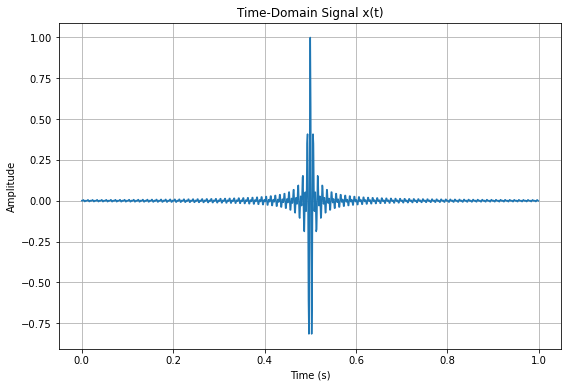

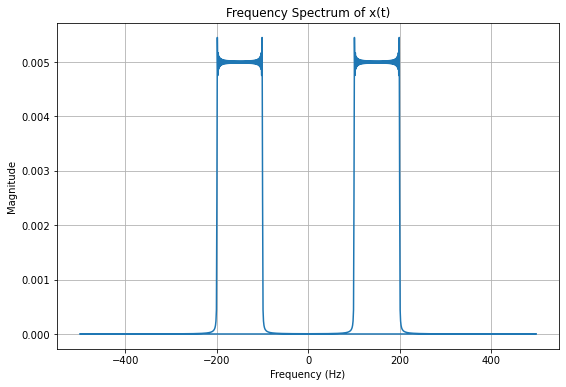

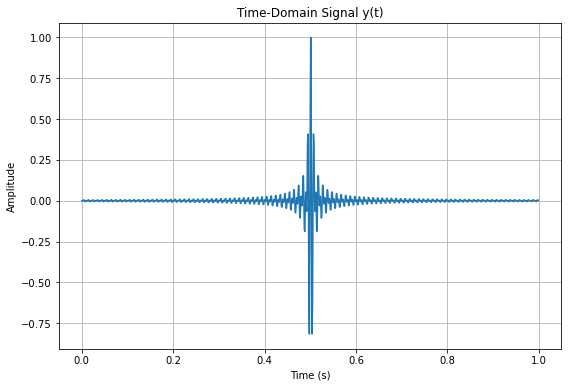

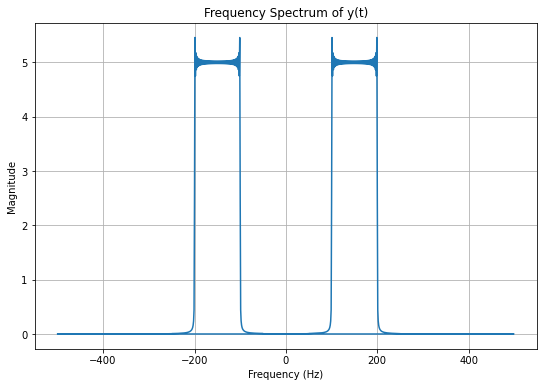

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft

# Define the parameters
Fs = 1000  # Sampling frequency in Hz
T = 1  # Duration of the signal in seconds
B = 100  # Bandwidth in Hz (B > Bc)
t = np.linspace(0, T, int(Fs * T), endpoint=False)  # Time vector

# Generate a pulse signal with bandwidth B
x = np.sinc(100 * (t - T / 2)) * np.cos(2 * np.pi * 150 * t) # Sinc pulse

# Plot the time-domain signal of x(t)
plt.figure(figsize=(9, 6))
plt.plot(t, x)
plt.title("Time-Domain Signal x(t)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)

# Save the time domain picture of x(t) to a folder (specify your desired folder path)
x_time_domain_image_path = 'x_time_domain_B_gt_Bc.png'
plt.savefig(x_time_domain_image_path)

# Compute the spectrum of x(t)
X = fft(x)/Fs

# Define the frequency axis
f = np.fft.fftfreq(len(t), 1 / Fs)

# Plot the frequency spectrum of x(t)
plt.figure(figsize=(9, 6))
plt.plot(f, np.abs(X))
plt.title("Frequency Spectrum of x(t)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)

# Save the frequency domain picture of x(t) to a folder
x_frequency_domain_image_path = 'x_freq_domain_B_gt_Bc.png'
plt.savefig(x_frequency_domain_image_path)

# Calculate the impulse response of the ideal low-pass filter
Bc = 200  # Cutoff frequency (choose a value less than B)
h_lp = 2* Bc * np.sinc(Bc * (t - T / 2)) * np.cos(2 * np.pi * 150 * t)

# Convolve x(t) with the impulse response to obtain y(t)
y = np.convolve(x, h_lp, 'same')
y = y / Fs  # Normalize by dividing by the number of data points

# Plot the time-domain signal of y(t)
plt.figure(figsize=(9, 6))
plt.plot(t, y)
plt.title("Time-Domain Signal y(t)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)

# Save the time domain picture of y(t) to a folder
y_time_domain_image_path = 'y_time_domain_B_gt_Bc.png'
plt.savefig(y_time_domain_image_path)

# Compute the spectrum of y(t)
Y = fft(y)

# Plot the frequency spectrum of y(t)
plt.figure(figsize=(9, 6))
plt.plot(f, np.abs(Y))
plt.title("Frequency Spectrum of y(t)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)

# Save the frequency domain picture of y(t) to a folder
y_frequency_domain_image_path = 'y_freq_domain_B_gt_Bc.png'
plt.savefig(y_frequency_domain_image_path)

# Display the images
plt.show()


In [14]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the four images
image_paths = ['x_time_domain_B_gt_Bc.png', 'x_freq_domain_B_gt_Bc.png', 'y_time_domain_B_gt_Bc.png', 'y_freq_domain_B_gt_Bc.png']
images = [Image.open(path) for path in image_paths]

# Determine the size of the output image (assuming all images have the same dimensions)
width, height = images[0].size

# Create a new blank image with the combined width and height
combined_image = Image.new('RGB', (2 * width, 2 * height))

# Paste the four images into the new image
for i in range(4):
    x = i % 2
    y = i // 2
    combined_image.paste(images[i], (x * width, y * height))

# Save the combined image
combined_image.save('combined_image_B_gt_Bc.png')

# Display the combined image
combined_image.show()
